In [2]:
!pip3 install numpy
!pip3 install pandas
!pip3 install openpyxl
!pip3 install matplotlib
!pip3 install statsmodels
!pip3 install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 793.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns 
sns.set_theme()

## Parte Mafer

# Actividad 9.1. 
Elabore un resumen de máximo una cuartilla sobre la lectura de la sección de antecedentes en (INEI, 2002)

La desestacionalización está asociada a la idea de que una serie de tiempo está constituida por componentes no observables. La idea de componentes no observables surge con un análisis económico en el siglo XIX, especificamente en Francia, donde se creó un comité encargado de proponer métodos para separar las componentes de la serie, con el fin básico de pronosticarlos por separado.
Posteriormente, Estados Unidos trató de hacer lo mismo pero con la idea de construir un sistema de índices llamado "barómetro de proyección del ciclo económico". para apreciar las condiciones corrientes de la economía nacional y para el pronóstico de su desarrollo futuro.

En 19192 Warren M. Person, publicó un artículo sobre los métodos de estudio y de pronóstico de las condiciones económicas generales de los Estados Unidos. El método de Pearson consiste en dos partes: primero, aislar estadísticamente los cambios ocasionados por las fluctuaciones en las condiciones de los negocios. Segundo, elaboración de cierto número de índices que señalarían en qué fase del ciclo económico se encuentra la economía general en un momento dado y que facilitarían un pronóstico de su desarrollo futuro.

Los métodos para encontrar estos índices, determinar y aislar los procesos que reflejan el ciclo económico, se denominaron métodos de Harvard.
En esta metodología se señala que la mayoría de las series presentan cuatro tipos de variaciones: 1) Variaciones que presentan cierta tendencia general 2) Fluctuaciones cíclicas o de la situación económica que aproximadamente corresponden a los ciclos económicos generales; 3) Fluctuaciones estacionales, que aparecen en series de datos trimestrales o mensuales; y 4) Fluctuaciones irregulares.

El procedimiento empleado en la investigación de Harvard para obtener las fluctuaciones cíclicas como un componente representante de la influencia del ciclo económico general sobre la marcha de la economía es como sigue: Se aísla la tendencia de la serie cronológica, suponiendo que es el resultado de un complejo de causas que actúan sostenidamente en una dirección e inducen el crecimiento de la economía nacional. Si la serie es trimestral o mensual se hallan las fluctuaciones estacionales cuyas causas están ligadas con frecuencia, al movimiento de la tierra (cambios de temperatura, días más largos o más cortos), o a causas de carácter social y convencional, como la elevación de las ventas en períodos de vísperas de días festivos.
Una vez que la tendencia y las fluctuaciones estacionales se han aislado, se sustraen de la serie original.
Es necesario mencionar al respecto, que la Escuela de Harvard sostenía que un cierto conjunto de causas produce la tendencia, independientemente de otro conjunto de causas que inducen las variaciones cíclicas.
En el largo plazo, lo que determina el movimiento de la series son factores. Estos factores son los que caracterizan la componente permanente o la tendencia de la serie. Además las fluctuaciones de las series alrededor de su componente permanente se define como componente cíclica.

Actualmente se han desarrollado procedimientos sofisticados para descomponer una serie de tiempo, en particular efectuar la desestacionalización de la serie (X11 ARIMA, X12 ARIMA), así como, una importante experiencia en el tratamiento empírico de los ciclos, tratando de caracterizarlos y prever su dinámica a través de un conjunto de series económicas utilizadas como indicadores de los ciclos de los negocios, clasificados en indicadores conducentes, coincidentes y retrasados.

# Ejemplo 9.1.1. 
Traveler ́s Rest, Inc., administra cuatro hoteles y están interesados en un modelo de pronóstico a corto plazo (un año) para la cantidad de habitaciones ocupadas en dichos hoteles, a efecto de decidir la contratación de empleados extra para el verano, así como presupuestos para publicidad y compra de materiales que tardan mucho en ser entregados. La tabla 9-1 muestra los datos disponibles de 14 años (el año 15 se utilizó como validación del modelo); dado que se desean pronósticos mensuales, se promediaron las observaciones de un mes entre el número de días del mes. Grafique los datos, identifique si existe algún tipo de patrón estacional y, si es necesario, aplique una transformación de potencia para lograr una fluctuación estacional constante.


## Carga de datos

In [33]:

df = pd.read_excel("/Users/maferpazaran/Downloads/Hab.xlsx")
df.head()

,t,Yt
0,1,501
1,2,488
2,3,504
3,4,578
4,5,545


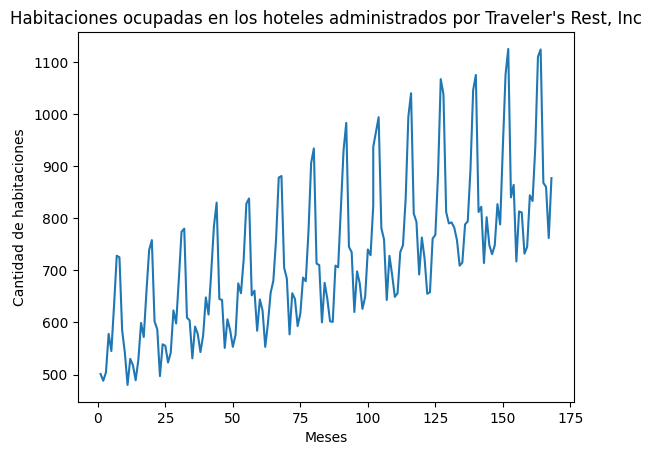

In [35]:
plt.plot(df['t'],df['Yt'])
plt.title("Habitaciones ocupadas en los hoteles administrados por Traveler's Rest, Inc")
plt.xlabel("Meses")
plt.ylabel("Cantidad de habitaciones")
plt.show()

Podemos observar que la gráfica de nuestra serie de tiempo, presenta tendencia creciente, por lo que la media no es constante.
Dicho esto, procederemos a identificar si nuestra serie tiene algún tipo de patrón estacional, esto lo haremos mediante la ACF y la PACF.

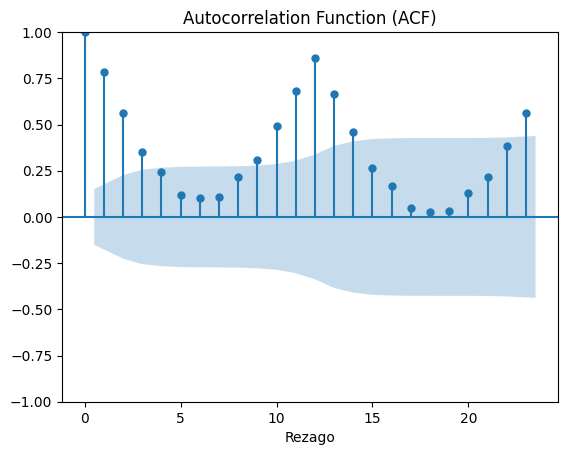

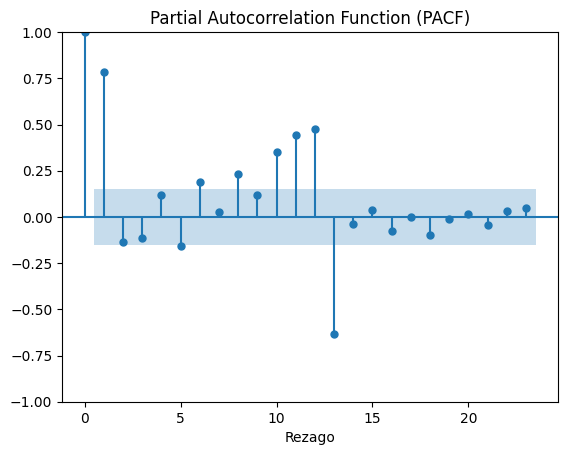

In [41]:
plot_acf(df['Yt'])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Rezago")
plt.show()

plot_pacf(df['Yt'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel("Rezago")
plt.show()

Como podemos observar en las gráficas de la ACF y la PACF, tenemos barras significativas que se repiten en intervalos regulares, es decir, nos indican que ciertos patrones o ciclos se repiten en la serie temporal, lo que es característico de la estacionalidad. Por lo que podemos concluir que si existe algún tipo de patrón estacional.

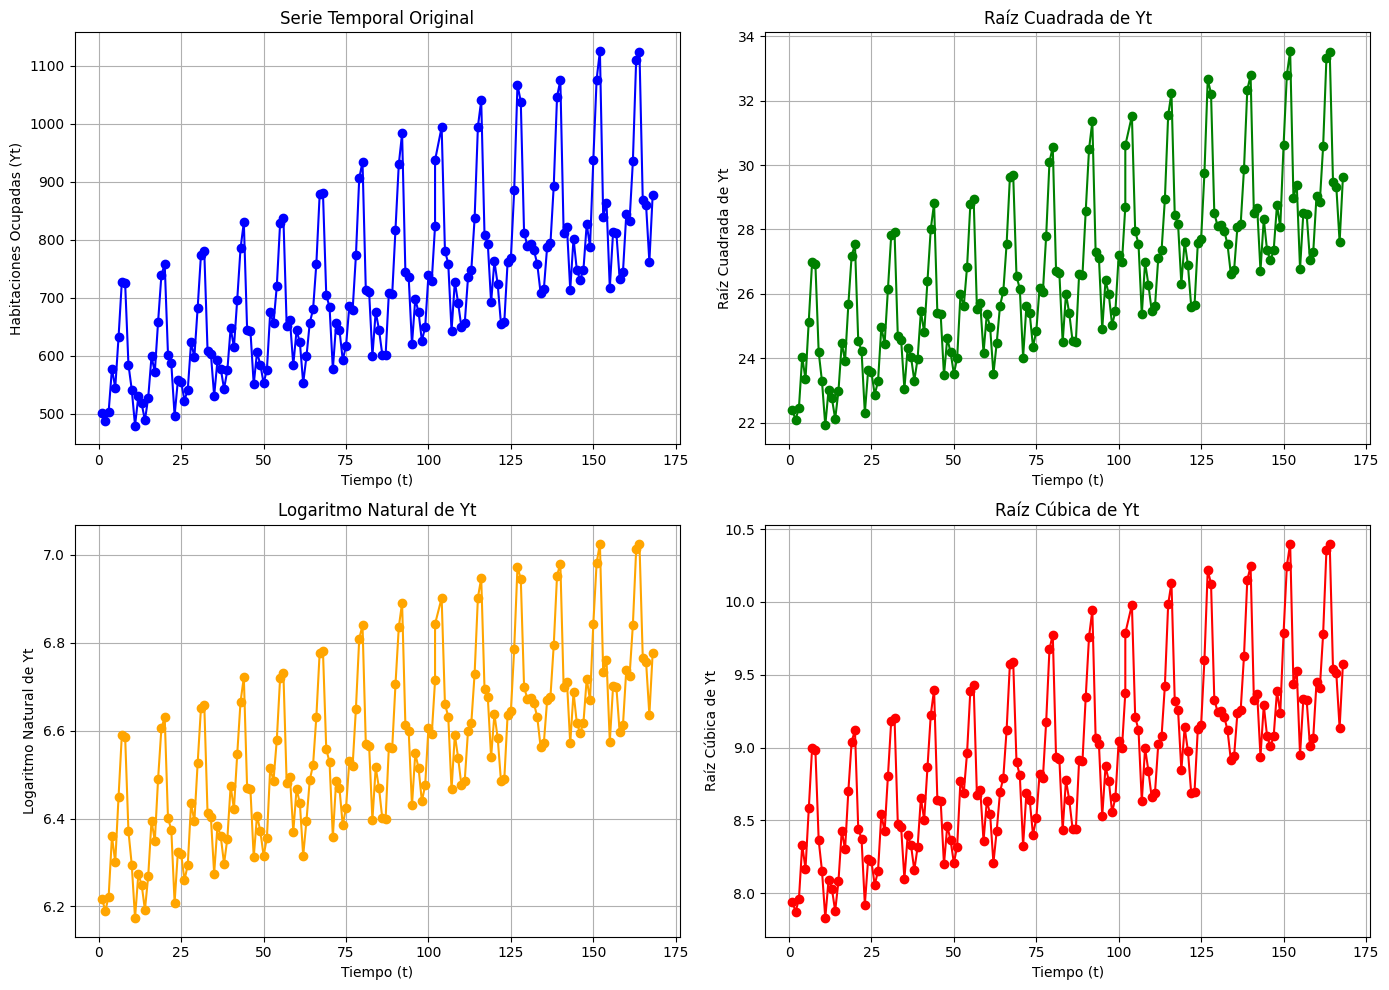

In [42]:
# Aplicar transformación de raíz cuadrada
df['sqrt_Yt'] = np.sqrt(df['Yt'])

# Aplicar transformación de logaritmo natural
df['log_Yt'] = np.log(df['Yt'])

# Aplicar transformación de raíz cúbica
df['cbrt_Yt'] = np.cbrt(df['Yt'])

# Graficar las transformaciones
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df['t'], df['Yt'], marker='o', color='blue')
plt.title('Serie Temporal Original')
plt.xlabel('Tiempo (t)')
plt.ylabel('Habitaciones Ocupadas (Yt)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df['t'], df['sqrt_Yt'], marker='o', color='green')
plt.title('Raíz Cuadrada de Yt')
plt.xlabel('Tiempo (t)')
plt.ylabel('Raíz Cuadrada de Yt')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df['t'], df['log_Yt'], marker='o', color='orange')
plt.title('Logaritmo Natural de Yt')
plt.xlabel('Tiempo (t)')
plt.ylabel('Logaritmo Natural de Yt')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df['t'], df['cbrt_Yt'], marker='o', color='red')
plt.title('Raíz Cúbica de Yt')
plt.xlabel('Tiempo (t)')
plt.ylabel('Raíz Cúbica de Yt')
plt.grid(True)

plt.tight_layout()
plt.show()


## Parte Raúl

# Articividad 9.4
#### Resuelva los problemas 1-20 propuestos al final del capítulo referido en el numeral anterior (últimos cinco).

In [26]:
!pip3 install scipy 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


##### 16.- Para el mes de diciembre, están dados los siguientes índices estacionales específicos:

$$
75.4, 86.8, 96.9, 72.6, 80.0, 85.4
$$
 
Si el ajuste es de 1.05 y se emplea el método modificado de la media y si la tendencia esperada para diciembre es de $900 ¿Cuál es el pronóstico de diciembre?

Eliminamos el valor más alto y el más bajo, promediamos los demás:

In [4]:
indices = [86.8,96.9,72.6,80.0]
mediaM = sum(indices)/4
mediaAj = mediaM*1.05
print(f'Media modificada para diciembre: {mediaM}')
print(f'Media de índice estacional ajutada: {mediaAj}')

Media modificada para diciembre: 84.075
Media de índice estacional ajutada: 88.27875


Para obtener el pronóstico multiplicamos la tendencia esperada por la media ajustada y dividimos entre la media modificada:

In [5]:
print(f"Pronóstico: {(900*mediaAj)/mediaM}")

Pronóstico: 945.0


El tema de pronósticar de esta manera es nuevo, por lo cuál tuve que buscar información acerca del método para saber si lo estaba empleando de manera correcta. A pesar de que encontré información, considero que ninguna me fue de real ayuda, además, el hecho de tomas esta unidad de forma autodidacta sin duda alguna aumenta la dificultad.

##### 17.- Un hotel de veraneo cerca de Portland, Maine, ha estado registrando por varios años sus ventas mensuales, aunque nunca ha analizado estos datos. El hotel calcula los Indices estacionales para sus ventas mensuales. ¿Cuáles de las siguientes declaraciones sobre el Indice son correctas?


a) La suma de los 12 números índices mensuales debe ser 1,200.

b) Un Indice de 85 en mayo indica que las ventas son menores en un 15% del promedio de las ventas mensuales.

c) Un Indice de 130 en enero indica que las ventas están 30% por arriba del promedio mensual de ventas.

d) El índice de cualquier mes debe estar entre cero y 200.

e) El índice promedio para cada uno de los 12 meses debería ser 100.

En este caso, los incisos correctos son el b), porque el índice estacional se calcula dividiendo las ventas de mayo por el promedio de ventas mensuales y multiplicando por 100. Un índice de 85 indica que las ventas de mayo son un 85% del promedio, por lo tanto, un 15% menor que el promedio. Y el inciso e) ya que es una característica común de los índices estacionales, ya que el promedio se toma como la línea base y se le asigna el valor de 100.

Para este ejercicio considero que más que teoría, fue necesaria la lógica. Evidentemente la teoría aporta mucho, ya que pues es lo que da sustento a los argumentos expuestos, sin embargo, para este ejercicio dominaba la lógica.

##### 18.- Al preparar un informe para June Bancock, gerente de la Kula Department Store, usted incluye las siguientes estadísticas de las ventas del último año. Al observarlas, la Sra. Bancock le dice "Este informe confirma lo que he estado diciendo; el negocio está mejorando cada vez más." ¿Es precisa esta afirmación? ¿Por qué?

In [2]:
df = pd.DataFrame({
    "MES": ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    "VENTAS (EN DÓLARES)": [125, 113, 189, 201, 206, 241, 230, 245, 271, 291, 320, 419],
    "ÍNDICE ESTACIONAL AJUSTADO": [51, 50, 87, 93, 95, 99, 96, 89, 103, 120, 131, 189]
    })
df.head()

,MES,VENTAS (EN DÓLARES),ÍNDICE ESTACIONAL AJUSTADO
0,Enero,125,51
1,Febrero,113,50
2,Marzo,189,87
3,Abril,201,93
4,Mayo,206,95


Para poder verificar esto, calculamos la tasa de crecimiento porcentual entre cada mes utilizando las ventas brutas y el índice estacional ajustado, encontraremos el promedio de estas tasas de crecimiento para cada conjunto de datos.

In [3]:
df["Tasa de Crecimiento Ventas Brutas (%)"] = (df["VENTAS (EN DÓLARES)"].pct_change() * 100).fillna(0)

# Calcular la tasa de crecimiento porcentual utilizando el Índice Estacional Ajustado
df["Tasa de Crecimiento Índice Estacional (%)"] = (df["ÍNDICE ESTACIONAL AJUSTADO"].pct_change() * 100).fillna(0)

# Calcular el promedio de las tasas de crecimiento para cada conjunto de datos
promedio_crecimiento_ventas_brutas = df["Tasa de Crecimiento Ventas Brutas (%)"].mean()
promedio_crecimiento_indice_estacional = df["Tasa de Crecimiento Índice Estacional (%)"].mean()

# Mostrar los resultados
print("Promedio de la tasa de crecimiento porcentual de las ventas brutas:", promedio_crecimiento_ventas_brutas)
print("Promedio de la tasa de crecimiento porcentual del Índice Estacional Ajustado:", promedio_crecimiento_indice_estacional)


Promedio de la tasa de crecimiento porcentual de las ventas brutas: 12.028047931983757
Promedio de la tasa de crecimiento porcentual del Índice Estacional Ajustado: 13.387627411516377


Notamos que existe un nivel arriba de cero para ambas tases de crecimiento porcentual, esto significa que efectivamente, el negocio ha tenido mejoras.

Uno de los temas que en lo personal me parecen más difíciles respecto a este tipo de entregas, es buscar ejemplos, puesto que a pesar de concoer la teoría, en ocasiones me es complicado visualisar la aplicación correcta de la misma.

##### 19.- A continuación se presentan los niveles de ventas trimestrales de Goodyear Tire. ¿Parece haber un efecto estacional significativo en sus niveles de ventas? Analice esta serie histórica para obtener cuatro indices estacionales y determine el alcance del componente estacional en las ventas de Goodyear.

In [34]:
df = pd.DataFrame({
    "Trimestre": [1, 2, 3, 4] * 10,
    "Año": [1985] * 4 + [1986] * 4 + [1987] * 4 + [1988] * 4 + [1989] * 4 +
           [1990] * 4 + [1991] * 4 + [1992] * 4 + [1993] * 4 + [1994] * 4,
    "Ventas": [
        2292, 2450, 2363, 2477,
        2063, 2358, 2316, 2366,
        2268, 2533, 2479, 2625,
        2616, 2793, 2656, 2746,
        2643, 2811, 2679, 2736,
        2692, 2871, 2900, 2811,
        2497, 2792, 2838, 2780,
        2778, 3066, 3213, 2928,
        2874, 3000, 2913, 2916,
        2850, 3100, 3100, 3050
    ]
})
df.head()

,Trimestre,Año,Ventas
0,1,1985,2292
1,2,1985,2450
2,3,1985,2363
3,4,1985,2477
4,1,1986,2063


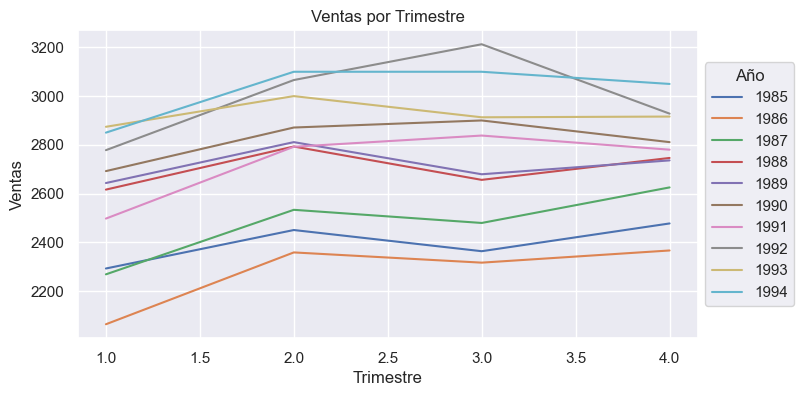

In [23]:
plt.figure(figsize=(8, 4))
for año in df["Año"].unique():
    datos_año = df[df["Año"] == año]
    plt.plot(datos_año["Trimestre"], datos_año["Ventas"], label=str(año))

plt.xlabel("Trimestre")
plt.ylabel("Ventas")
plt.title("Ventas por Trimestre")
plt.legend(title="Año", loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

Consideramos que en efecto hay un efecto estacional para nuestros datos, puesto que podemos notar que del primer al segundo trimestre las ventas suben para todos los años, además, del segundo al tercer trimestre en la mayoría de los años se tuvo una baja en ventas, por lo que, sí parece haber un efecto estacional.

In [43]:
df['Promedio Móvil'] = df['Ventas'].rolling(window=4).mean()
df['Índice estacional'] = (df['Ventas']/df['Promedio Móvil'])*100
df.head(7)

,Trimestre,Año,Ventas,Promedio Móvil,Índice estacional
0,1,1985,2292,NaN,NaN
1,2,1985,2450,NaN,NaN
2,3,1985,2363,NaN,NaN
3,4,1985,2477,2395.50,103.402212
4,1,1986,2063,2338.25,88.228376
5,2,1986,2358,2315.25,101.846453
6,3,1986,2316,2303.50,100.542652


a) ¿Usted usaría usted para el pronóstico el componente de tendencia, el estacional, o ambos?

Se observa un patrón claro de crecimiento en las ventas a lo largo del tiempo, utilizaremos el componente de tendencia para capturar esa dirección general. También se detectaron patrones estacionales en los datos, como picos de ventas en ciertos trimestres. 

b) Pronostique el último trimestre de 1994


In [58]:
promedio_movil_ultimo_trimestre_1994 = df['Promedio Móvil'][38]
indice_estacional_ultimo_trimestre_1994 =df['Índice estacional'][38]
# Pronóstico para el último trimestre de 1994
pronostico_ultimo_trimestre_1994 = promedio_movil_ultimo_trimestre_1994 * indice_estacional_ultimo_trimestre_1994

print("Pronóstico para el último trimestre de 1994:",  pronostico_ultimo_trimestre_1994 )


Pronóstico para el último trimestre de 1994: 309999.99999999994


c) Comapre sus pronòsticos con los de Valuse Line

Notamos que hay un error de casi %0,000.00, por lo que podemos decir que es una buena aproximación 

El tema de tener que revisar materiales por tu propia cuenta resulta bastante màs agotador, ya que, es necesario revisar bastantes fuentes para comprender perfectamente como es que se deben realizar los procedimientos de de manera correcta.

#### 3. Del Banco de Información Económica (INEGI, 2015a) ingrese a indicadores económicos de coyuntura, producto interno bruto trimestral base 2013, series originales, valores a precios de 2013, actividades primarias y exporte la serie 11 agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza. Obtenga la serie original corregida por efectos del calendario, la serie desestacionalizada y la serie tendencia-ciclo. Compare sus resultados con los que ofrece el INEGI.


Para comenzar cargamos los datos descargados del INEGI

In [18]:
df = pd.read_excel("ProductoIA2.xlsx")
df.head()

,Periodos,Producto interno bruto trimestral
0,1980/01,320667.549
1,1980/02,287579.268
2,1980/03,304948.751
3,1980/04,316649.932
4,1981/01,335400.962


In [4]:
import statsmodels.api as sm

Para realizar de forma más sencilla los procesos, renombramos las columnas. Además, para poder obtener los datos en formato año/mes, procesamos las fechas para obtener los meses. Mostramos los resultados en gráficas:

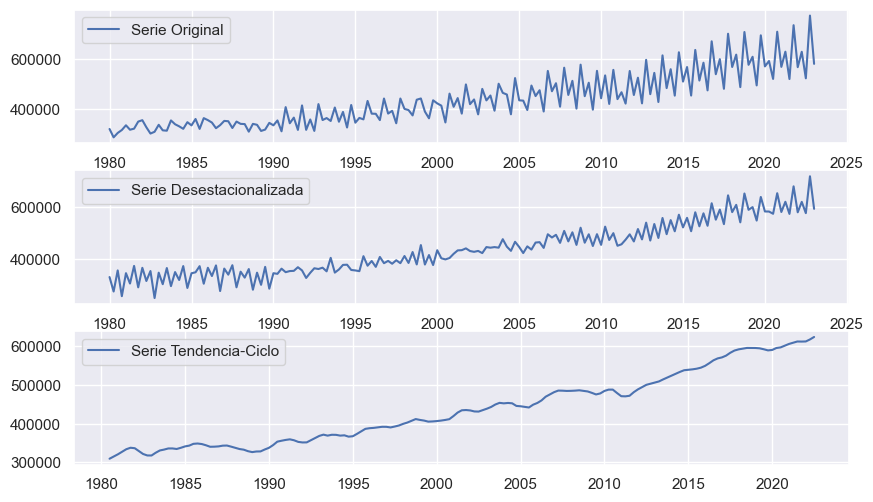

In [19]:
df.columns = ['Periodos', 'PIB']
def convertir_fecha_trimestral(fecha_str):
    year, quarter = fecha_str.split('/')
    month = int(quarter) * 3 - 2
    return pd.Timestamp(year=int(year), month=month, day=1)

df['Periodos'] = df['Periodos'].apply(convertir_fecha_trimestral)
df.set_index('Periodos', inplace=True)
ts = df['PIB']
res_calendar = sm.tsa.seasonal_decompose(ts, model='additive')
desestacionalizada = ts - res_calendar.seasonal
serie_tendencia_ciclo = res_calendar.trend
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(ts, label='Serie Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(desestacionalizada, label='Serie Desestacionalizada')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(serie_tendencia_ciclo, label='Serie Tendencia-Ciclo')
plt.legend()

plt.show()

Tal vez por un tema de disponibilidad, pero no conseguí visualizar los resultados de estos procesos proporcionados por el INEGI. Esta actividad me resulto un tanto difícil, no por el hecho de hacer lo que se pedía, si no por comprenderlo, fue necesario tratar de hilar ideas y conceptos del cuadernillo y del material aportado en el SEA.

#### 4. Indague cuáles son las actividades secundarias en la economía mexicana y por qué se utiliza la base 2013.

De acuerdo con información proporcionada en la página web del gobierno, las actividades secundarias corresponden a los sectores dedicados a la industria de la minería, manufacturas, construcción y electricidad. Actualmente no se usa la base 2013, se usa la base 2018 debido a que se  incorporan nuevos productos, mayor nivel de
desagregación en los indicadores y series de información más largas. Se toman en cuenta tanto necesidades que las y los usuarios expresaron en el proceso de Consulta Pública, como las recomendaciones internacionales en materia de cuentas nacionales, matrices insumo-producto, cuentas de corto plazo, regionales y satélite. 


# *Ejemplo 9.3.1* Aplique los métodos de descomposición aditiva y multiplicativa a la serie del índice general de comercio al por menor en México. Compare sus resultados y discútalos.


Cargamos los datos descargados de la página web del INEGI:

In [3]:
df = pd.read_excel('IndiceComercioMenor.xlsx')
df.head()

,Periodos,ICN
0,2008/01,92.177933
1,2008/02,92.075461
2,2008/03,90.827257
3,2008/04,92.036510
4,2008/05,91.362522


Calculamos la descomposición de la serie de tiempo en dos componentes: estacionalidad, tendencia. Calculamos la media móvil utilizando una para suavizar la serie y obtener la tendencia. Restamos la media móvil de la serie original para obtener la componente estacional y la tendencia es obtenida directamente de la media móvil.

In [4]:
df.set_index('Periodos', inplace=True)
ts = df['ICN']
rolling_mean = ts.rolling(window=4).mean()
estacionalidad = ts - rolling_mean
tendencia = rolling_mean
residuos = ts - (tendencia + estacionalidad)
dfRes = pd.DataFrame({'Estacionalidad': estacionalidad, 'Tendencia': tendencia})
dfRes.head(8)


,Estacionalidad,Tendencia
Periodos,,
2008/01,NaN,NaN
2008/02,NaN,NaN
2008/03,NaN,NaN
2008/04,0.257220,91.779290
2008/05,-0.212915,91.575438
2008/06,-0.000999,91.408430
2008/07,-0.510226,91.432079
2008/08,-0.768197,90.974537


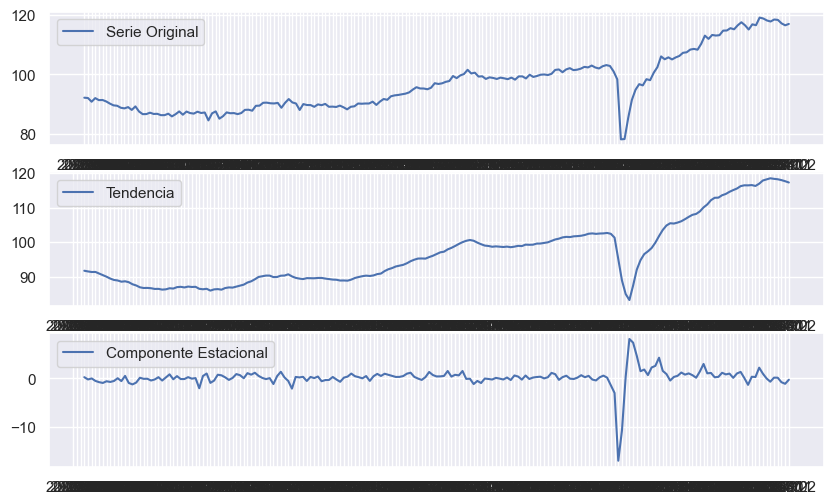

In [5]:
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(ts, label='Serie Original')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(tendencia, label='Tendencia')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(estacionalidad, label='Componente Estacional')
plt.legend()
plt.show()

Este ejercicio, al igual que el pasado tengo ciertas dudas de si se realizo de forma correcta, puesto que el INEGI no tiene estos datos, incluso fue un poco complicado enontrar los datos originales con los que se trabajaron.

# *Actividad 9.5*

#### 1.- En el Banco de Información Económica (INEGI, 2015a), ubíquese en el rubro Manufacturas, encuesta mensual de la industria manufacturera (EMIM), índice de remuneraciones medias reales por persona ocupada, total, total de la industria manufacturera. Modele la serie de tiempo correspondiente al total de la industria manufacturera.


Para comenzar, cargamos los datos:

In [2]:
df = pd.read_excel("Manufacturas.xlsx")
df.head()

,Periodos,Índices de remuneraciones
0,2007/01,88.8
1,2007/02,88.9
2,2007/03,95.5
3,2007/04,95.8
4,2007/05,118.0


Los graficamos:

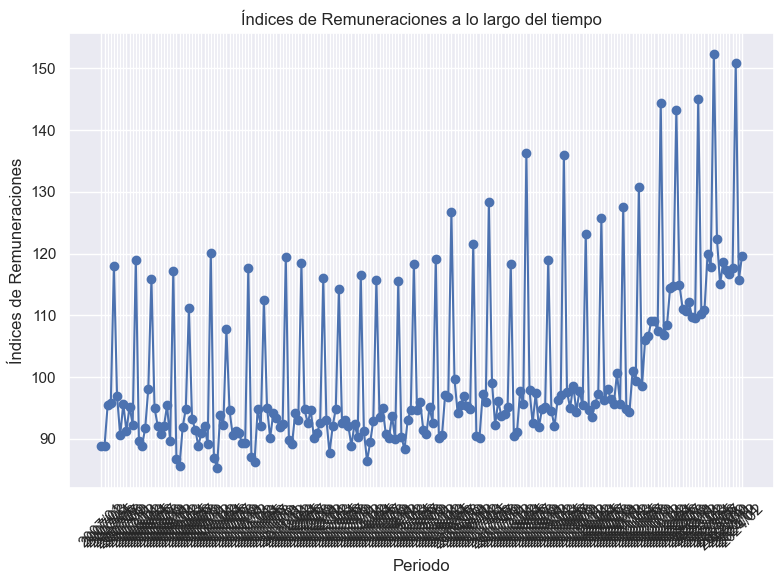

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(df['Periodos'], df['Índices de remuneraciones'], marker='o', linestyle='-')
plt.title('Índices de Remuneraciones a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Índices de Remuneraciones')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Notamos que no hay media constante, puesto que, aunque sea ligeramente, la gráfica de nuestros datos crece, además de que tampoco parece haber varianza constante. Obtenemos la ACF:

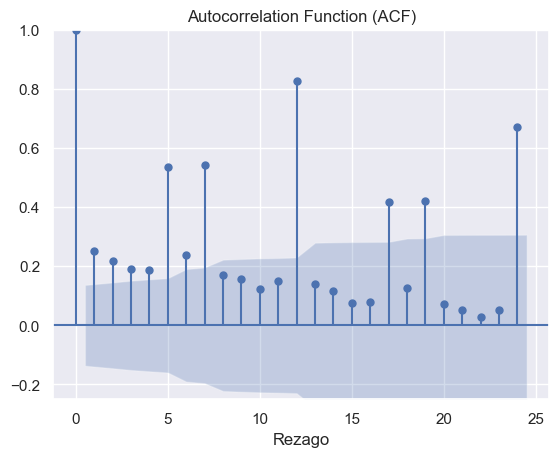

In [5]:
plot_acf(df['Índices de remuneraciones'])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Rezago")
plt.ylim(-0.25,1)
plt.show()

Notamos que tenemos estacionalidad de periodo 12 por lo que serpa necesario realizar diferencias para poder eliminarla. Además aplicamos el test de Dickey Fuller para comprobar la media y el de Leven para saber si será necesario transformar la serie.

In [6]:
segmentos = []
for i in range(0, len(df), 12):
    segmento = df.iloc[i:i+12]
    segmentos.append(segmento)

El test de Levene nos arroja un p valor de 0.999, esto es mayor a 0.05, lo cual nos indica que no rechazamos la hipótesis nula, es decir, existe homocedasticidad, en conclusión, no es necesario aplicar una tranformación. A pesar de lo anterior, realizamos un grafico de cajas para poder determinar si es conveniente o no realizar una transformación:

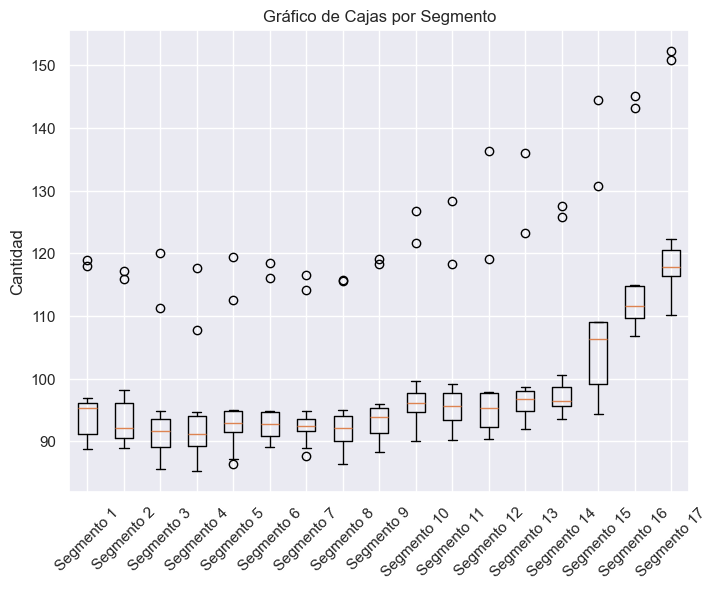

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot([
    segmentos[0]['Índices de remuneraciones'],
    segmentos[1]['Índices de remuneraciones'],
    segmentos[2]['Índices de remuneraciones'],
    segmentos[3]['Índices de remuneraciones'],
    segmentos[4]['Índices de remuneraciones'],
    segmentos[5]['Índices de remuneraciones'],
    segmentos[6]['Índices de remuneraciones'],
    segmentos[7]['Índices de remuneraciones'],
    segmentos[8]['Índices de remuneraciones'],
    segmentos[9]['Índices de remuneraciones'],
    segmentos[10]['Índices de remuneraciones'],
    segmentos[11]['Índices de remuneraciones'],
    segmentos[12]['Índices de remuneraciones'],
    segmentos[13]['Índices de remuneraciones'],
    segmentos[14]['Índices de remuneraciones'],
    segmentos[15]['Índices de remuneraciones'],
    segmentos[16]['Índices de remuneraciones'],
], labels=['Segmento 1', 'Segmento 2', 'Segmento 3', 'Segmento 4', 'Segmento 5', 'Segmento 6','Segmento 7', 'Segmento 8', 'Segmento 9', 'Segmento 10', 'Segmento 11', 'Segmento 12','Segmento 13', 'Segmento 14', 'Segmento 15', 'Segmento 16', 'Segmento 17'])
plt.title('Gráfico de Cajas por Segmento')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Podemos notar que en efecto, la variabilidad es pequeña, las cajas y los bigotes de las mismas con de tamaños muy similares. Aplicamos Dickey-Fuller para saber si es necesario diferenciar:

In [31]:
from statsmodels.tsa.stattools import adfuller
serie_tiempo = df['Índices de remuneraciones']
# Aplicar el test de Dickey-Fuller Aumentado
resultado_adf = adfuller(serie_tiempo)
print('Estadística de prueba ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
for key, value in resultado_adf[4].items():
    print(f'\t{key}: {value}')


Estadística de prueba ADF: 1.4442063784464068
Valor p: 0.997305996273127
	1%: -3.4652439354133255
	5%: -2.8768752281673717
	10%: -2.574944653739612


El resultado del test nos indica que debemos realizar diferencias. Así que realizamos las diferencias estacionales y las convencionales. Observamos la serie original, la ACF y l PACF:

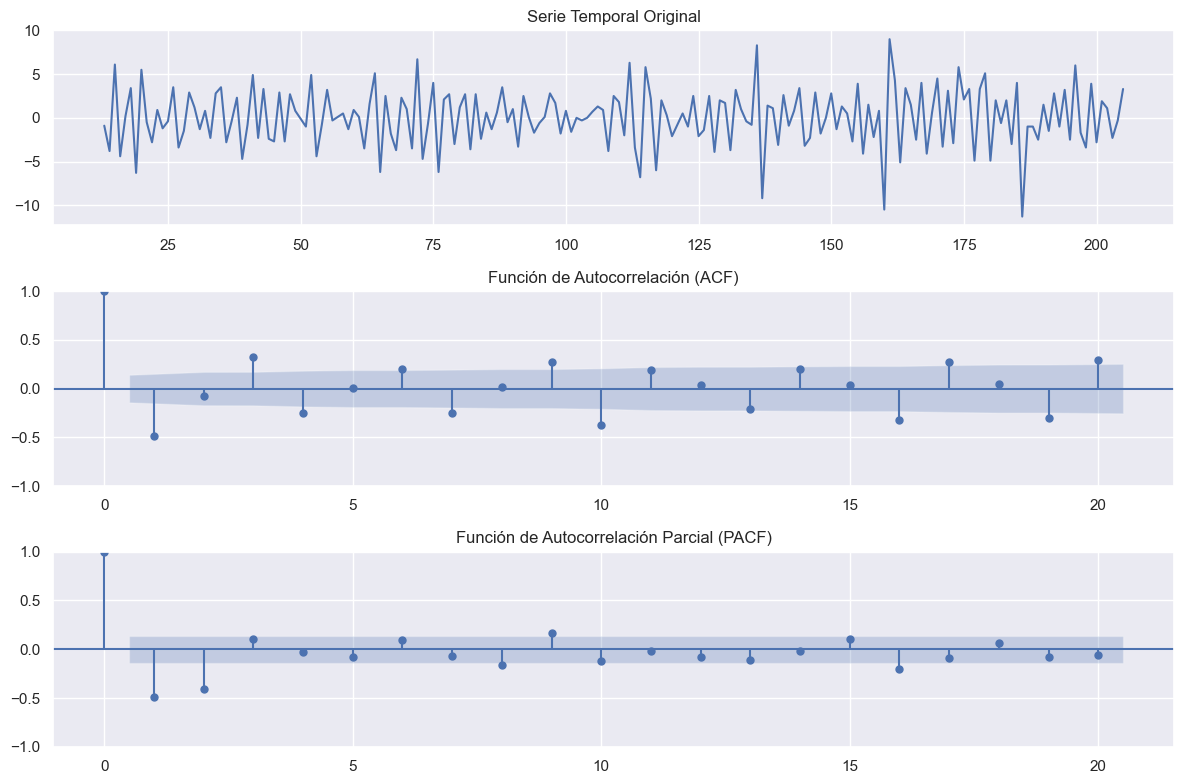

In [29]:
serie_dif = df['Índices de remuneraciones'].diff()
seriedif_esta = serie_dif - serie_dif.shift(12)
# Grafica la serie original
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(seriedif_esta)
plt.title('Serie Temporal Original')

# Grafica la función de autocorrelación (ACF)
plt.subplot(3, 1, 2)
plot_acf(seriedif_esta[13:], ax=plt.gca(), lags=20)  # 'lags' determina cuántos rezagos mostrar
plt.title('Función de Autocorrelación (ACF)')

# Grafica la función de autocorrelación parcial (PACF)
plt.subplot(3, 1, 3)
plot_pacf(seriedif_esta[13:], ax=plt.gca(), lags=20)  # 'lags' determina cuántos rezagos mostrar
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

Efectivamente hemos estabilizado la media, volvemos a aplicar Dickey-Fuller:

In [33]:
serie_tiempo = seriedif_esta[13:]
# Aplicar el test de Dickey-Fuller Aumentado
resultado_adf = adfuller(serie_tiempo)
print('Estadística de prueba ADF:', resultado_adf[0])
print('Valor p:', resultado_adf[1])
for key, value in resultado_adf[4].items():
    print(f'\t{key}: {value}')

Estadística de prueba ADF: -4.910179780577977
Valor p: 3.3317643526401424e-05
	1%: -3.467845319799907
	5%: -2.878011745497439
	10%: -2.575551186759871


Tenemos un p-value muy pequeño, es decir, en efecto hemos estabilizado la madia. Observando la ACF y la PACF notamos que para la parte no estacional, la ACF se trunca en un lag y la PACF decrese, mientras que para la parte estaciona, la ACF decrese y la PACF se trunca en un lag, por lo que s epropone un modelo $ARIMA(0,1,1)(1,1,0)_{12}$

In [42]:
from statsmodels.tsa.arima.model import ARIMA
#serie_temporal=seriedif_esta[13:]
serie_temporal = df['Índices de remuneraciones']
modelo = ARIMA(serie_temporal, order=(0, 1, 1), seasonal_order=(1, 1, 0, 12))
resultado = modelo.fit()

# Haz predicciones
predicciones = resultado.predict(start=0, end=len(serie_temporal) + 5)  # Predice 12 pasos hacia adelante

#### 2.-Realice la lectura de la sección 2.5 en INEI (2002), correspondiente a la metodología de desestacionalización con X12-ARIMA.

El desarrollo metodológico consiste básicamente en:
* Modelas la serie oir medio de un proceso autorregresivo integrado de medias móviles (modelos ARIMA) propuesto por Box-Jenkins.

* Extrapolar la serie original un año en cada extremo con el modelo ARIMA que mejor ajuste y proyecte la serie.

* Desetacionalizar la serie extendida usando promedios móviles.

El X12 ARIMA provee diferentes pruebas estadísticas como las que se detallan a continuación:

a) Prueba F de identificación de estacionalidad: detecta si la serie etiene estacionalidad estable o móvil. 

a.1 Prueba F de estacionalidad establa: identifica aquella estacionalidad que se distribuye de forma regular.

a.2 Prueba F de estacionalidad móvil: Identifica aquella estacionalidad que varía con el transcurso del tiempo.

La prueba F de Diagnóstico, planeta como hiótesis:

$$
H_{0}\text{: No presenta estacionalidad identificable}
$$
$$
H_{1}\text{: Presenta estacionalidad identificable}
$$

b) Prueba Q de bondad de ajuste estacional: se realiza mediante los llamados estadísticos de control de calidad M1, M2 ... M11. El ajuste estacional solo es aceptable si Q es menor que 1, por lo tanto cuanto más cercano es a 0 está el valor Q, mejor es la calidad de la desestacionalización.



    

#### 3. Realice la lectura de Cortez (2008), relacionada con el uso de X12-ARIMA con efecto calendario a una cierta serie temporal.


Se supone que en los datos diarios existeuna cierta periodicidad semanal completamente determinista que deber ́ıa transmitirse a la serie mensual, sin embargo, debido a que $(i)$ los meses no tienen el mismo n umero de días, $(ii)$ un mismo mes, al paso del tiempo, presenta variaciones respecto al número de días específicos de la semana (lunes, por ejemplo) que contiene, y $(iii)$ existen festividades, tanto movibles como fijas, en las que la actividad económica se detiene.

El componente de efectos calendarios engloba todos aquellos efectos determin´ısticos producto de la composición del calendario de un país. Esos efectos de los días hábiles, así como la estacionalidad, pueden hacer delicadas las comparaciones de los valores de la serie entre un mes y otro de un mismo año.  Este fenómeno es conocido como efecto días de actividad y su remoci´on equivale a homogeneizar la serie en este sentido, a efectos de hacer comparables iguales meses de distintos años. 

X12 ARIMA permite incluir variables regresoras para poder estimar los efectos del calendario mismo a las series econ´omicas, para dicho efecto el programa tiene incorporado una gran gama de variables de regresión predefinidas adem´as de la opci´on de incorporar otras variables a ser definidas por el usuario que permiten estimar diferentes tipos de modelos.

No obstante lo anterior, existe el problema de que el calendario incorporado en el programa X12 ARIMA es de acuerdo a las festividades del calendario de los Estados Unidos y no del resto del mundo. Por lo que se incorporó un modulo que permite estimar el modelo con los días del calendario Chileno incorporando una matriz con el número de días y feriados existentes según el calendario nacional.

* Modelo de días hábiles 
* Incorporación de días feriados 
* Interpretación y testeo




#### 4. Realice la lectura de la sección 3.2 en Giraldo (2006), que describe dos metodologías de descomposición con base en suavizadores.

* Regresión Local Loess: 

Es un modelo de regresión no-paramétrica que regresa $Y_i$ versus $x_i$, pero no asume un modelo global fijo, es decir, no asume un intercepto y una pendiente fijas sino variables, de manera local. Aquí local significa una ventana móvil que contiene un número determinado de datos de la variable independiente.

* STL: Método de descomposición basada en Regresión Loess:

Es un método para estimar las componentes $T_t$ y $S_t$ con base en Regresión Loess, desarrollado por Cleveland, consiste de una secuencia de dos aplicaciones iteradas de Regresión Loess. Para aplicar este método se debe especificar una frecuencia de muestreo relacionada con el período de la componente estacional.

#### 5. Complemente la lectura del numeral anterior con las primeras seis páginas de Cleveland, Cleveland, McRae, & Terpenning (1990), creadores del filtro STL.

#### 6. Auxíliese de R para ejemplificar el uso de las metodologías de descomposición con base en suavizadores en el análisis de una serie de tiempo del Banco de Información Económica (INEGI, 2015a).

Aplicaremos dichas metodologías de descomposición para la serie de tiempo utilizada en la actividad 9.4. Exportamos los datos:

In [3]:
df = pd.read_excel("ProductoIA2.xlsx")
df.head()

,Periodos,Producto interno bruto trimestral
0,1980/01,320667.549
1,1980/02,287579.268
2,1980/03,304948.751
3,1980/04,316649.932
4,1981/01,335400.962


In [4]:
df = pd.read_excel("ProductoIA2.xlsx")
df.columns = ['Periodos', 'PIB']
def convertir_fecha_trimestral(fecha_str):
    year, quarter = fecha_str.split('/')
    month = int(quarter) * 3 - 2
    return pd.Timestamp(year=int(year), month=month, day=1)

df['Periodos'] = df['Periodos'].apply(convertir_fecha_trimestral)
df.set_index('Periodos', inplace=True)

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

Observamos nuestra serie, además de su tedendencia (evidentemente es creciente) y su estacionalidad:

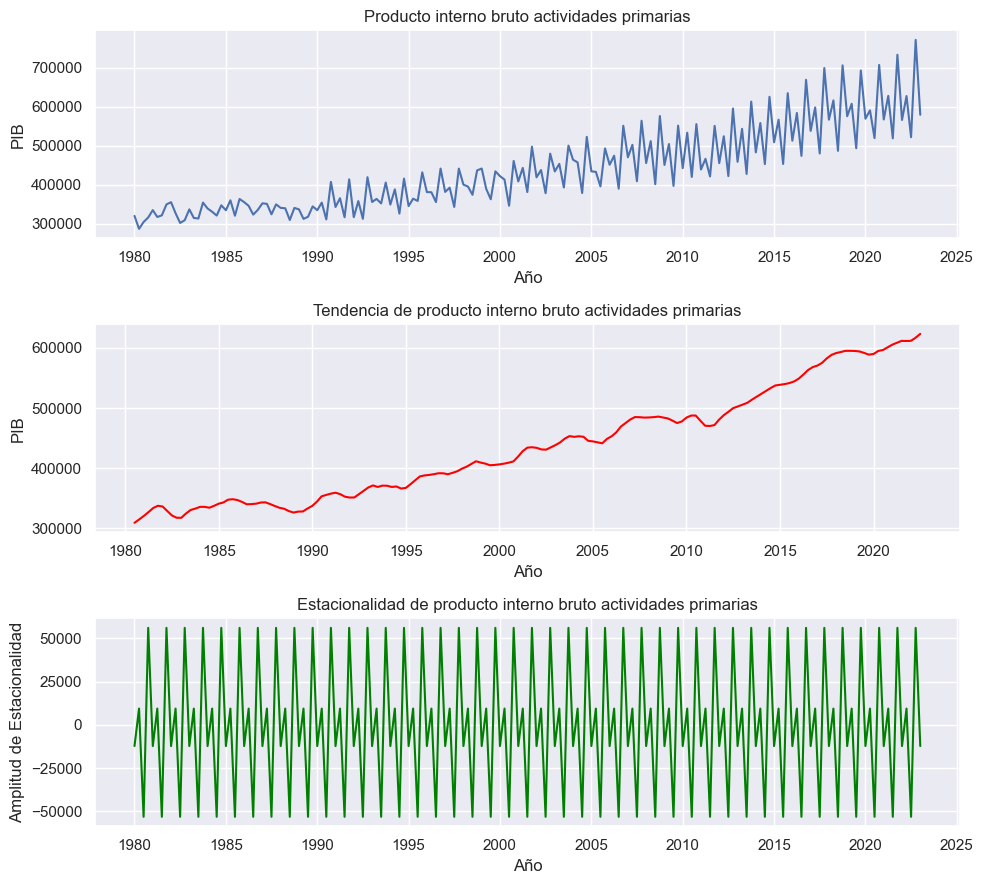

In [6]:
# A continuación, realiza la descomposición estacional
result = seasonal_decompose(df['PIB'], model='additive')

# Graficar los datos originales
plt.figure(figsize=(10,9))
plt.subplot(3, 1, 1)
plt.plot(df.index, df['PIB'])
plt.title("Producto interno bruto actividades primarias")
plt.xlabel("Año")
plt.ylabel("PIB")

# Graficar la tendencia
plt.subplot(3, 1, 2)
plt.plot(result.trend, color='red')
plt.title("Tendencia de producto interno bruto actividades primarias")
plt.xlabel("Año")
plt.ylabel("PIB")

# Graficar la estacionalidad
plt.subplot(3, 1, 3)
plt.plot(result.seasonal,color='green')
plt.title("Estacionalidad de producto interno bruto actividades primarias")
plt.xlabel("Año")
plt.ylabel('Amplitud de Estacionalidad')

plt.tight_layout()
plt.show()

In [1]:
from statsmodels.tsa.seasonal import STL
from statsmodels.nonparametric.smoothers_lowess import lowess

In [7]:
def local_regression_loess(data, frac=0.6):
    smoothed = lowess(data, range(len(data)), frac=frac)
    return smoothed[:, 1]

def stl_decomposition(data, period=12, seasonal=13):
    stl = STL(data, seasonal=seasonal)
    result = stl.fit()
    seasonal_component = result.seasonal
    trend_component = result.trend
    residual_component = result.resid
    return trend_component, seasonal_component, residual_component


In [8]:
df['PIB_smoothed'] = local_regression_loess(df['PIB'])
trend, seasonal, residual = stl_decomposition(df['PIB'])
df.head()

,PIB,PIB_smoothed
Periodos,,
1980-01-01,320667.549,312629.920655
1980-04-01,287579.268,313604.128254
1980-07-01,304948.751,314581.018892
1980-10-01,316649.932,315560.737503
1981-01-01,335400.962,316543.453606


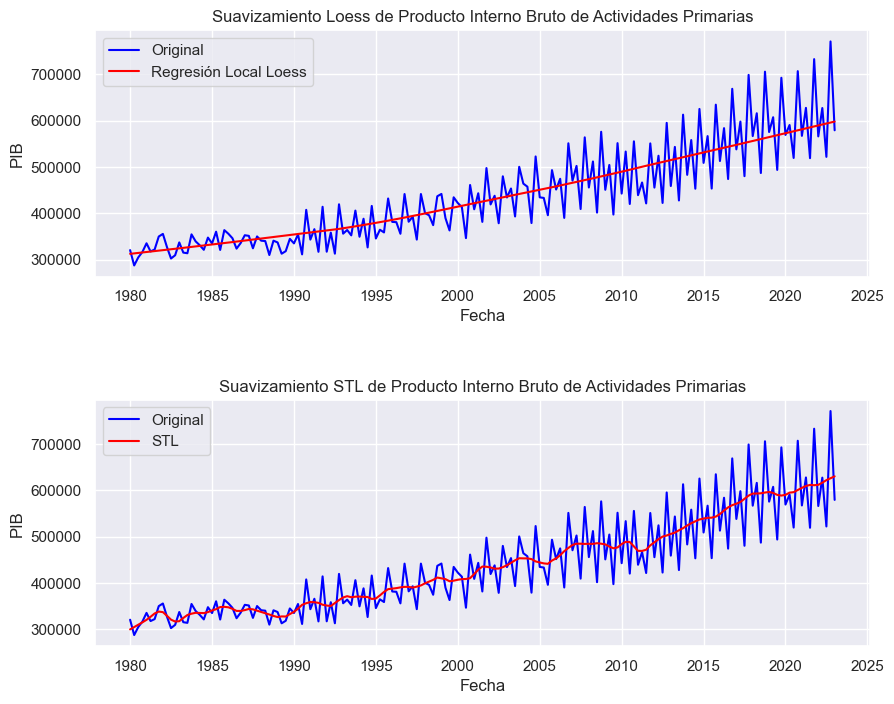

In [12]:
plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)
plt.title('Suavizamiento Loess de Producto Interno Bruto de Actividades Primarias')
plt.plot(df['PIB'],color='blue',label='Original')
plt.plot(df['PIB_smoothed'],color='red', label='Regresión Local Loess')
plt.xlabel('Fecha')
plt.ylabel('PIB')
plt.legend()

plt.subplot(2,1,2)
plt.title('Suavizamiento STL de Producto Interno Bruto de Actividades Primarias')
plt.plot(df['PIB'],color='blue',label='Original')
plt.plot(trend,color='red', label='STL')
plt.xlabel('Fecha')
plt.ylabel('PIB')
plt.subplots_adjust(hspace=0.5)
plt.legend()


plt.show()

Para ambos casos podemos ver que se aplicaron satisfactoriamente los métodos de descomposición. Me surge la pregunta sobre qué método es mejor usar en qué ocasiones. Investiganto un poco encontré que depende del objetivo que se tenga y de la natruzaleza de los datos, por ejemplo, si existe una estacionalidad muy pronunciada, nos conviene usar STL, sin embargo, cuando se tienen tendencias no lineales, usamos Loess.

#### 7. Resuelva los problemas 1 a 5 del capítulo 7 en Bowerman, O'Connell, & Koehler (2007), utilizando R siempre que sea posible y si no, Excel, pero no realice cálculos manuales

##### 1. Internations Machinery, Inc. fabrica un tractos y quiere utilizar los datos observados de las ventas trimestrales del tractor durante los últimos cuatro años para predecir las ventas del vehículo para el siguiente año. En la figura 7.5 se presenta una salida de Excel del análisis de descomposición multiplicativa de dichos datos

a) Encuentre los cuatro facotres estacionales para los trimestres 1, 2, 3 y 4, y elavore un informe.

b) ¿Cuál es la ecuación de la tendencia estimada que se calculó de usando datos comprensados respecto a la variacion estacional?

c) Calcule $\hat{y}_{17}$, $\hat{y}_{18}$, $\hat{y}_{19}$ y $\hat{y}_{20}$ usando la tendencia estimada y los factores estacionales.

d) Calcule un pronóstico puntual de las ventas totales del tractos para el año próximo (año5)

e) ¿Los factores cíclicos determian un ciclo muy bien definido para estos datos? Explique su respuesta.

f) Identifique pronósticos puntuales de las ventas de los tractores (con base en la tendencia y los factores estacionales) en la Figura 7.5 para cada uno de los trimestres del año proximo (año 5) ¿Los valores concuerdan con la respuesta que obtuvo en el inciso c?

g) Utulice los 16 valores de las ventas de tractores y construya la hoja de cálculo de Excel de la Figura 7.5 para ejecutar los pasos del método de descomposición multiplicativa.

h) En la Figura 7.6 se ilustra la salida de MINITAB de los pronósticos del intervalo de predicción del 95% de las ventas de tractores compensadas respecto a la variación estacional para cada uno de los cuatro trimestres del ao próximo (año 5). Utilice los resultados de esta salida para calcular los pronósticos del intervalo de predicción del 95% aproximado de las ventas de los tractores por cada uno de los trimestres del año próximo.

##### 2. Los datos de la tabla 7.5 dan las ventas trimestrales del popular juego Oligopoly en la tienda J-Mart. Utilice el método de la descomposición multiplicativa para pronosticar las ventas de Oligopoly para el año 4. Se recomienda usar una hoja de cálculo para todos los incisos, excepto h) y n)

a) Calcule las medias móviles de cuatro periodos apropiadas para estas ventas.



b) Determine las medias móviles centradas para estos datos

c) Encuentre los valores sn, x ir, para estos datos

d) Calcule las estimaciones de los factores estacionales para ls ventas trimestrales de Oligopoly (es decir, calcule los valoes sn, de estos datos)

e) Calcule las observaciones compensadas respecto a la variación estacional de estos datos

f) Grafique las obesrvaciónes compensadas respecto a la variación estacional contra el tiempo. A partir de su gráfica de datos ¿Qué clase de tendencia parece haber? 

g) Si se seupone que una tendencia lineal 

$$
TR_{i} = \beta_{0} + \beta_{1}t
$$

describe las observaciones compensadas respecto a la variación estacional, determine las estimaciones puntuales de mínimos cuadrados de $\beta_{0}$ y $\beta_{1}$

h) Utilice un programa para computadore como SAS para determinar lo siguiente:
1. Calcule las estimaciones puntuales de mínimos cuadrados de $\beta_{0}$ y $\beta_{1}$, los parámetros de la línea de tendencia $TR_{i} = \beta_{0} + \beta_{1}t$ que describe las observaciones compensadas respecto a la variación estacional.

2. Calcule los pronósticos puntuales de las ventas de Oligopoly compensadas respecto a la variación estacional para los cuatro trimestres del año 4

3. Determine los ´ronósticos del intervalo de predicción del 95% de las ventas de Oligopoly compensadas respecto a las variación estacional para los cuatro trimestres del año 4.


i) Cálcule los valores cl, x ir, para los datos de Oligopoly

j) Determine las estimaciones de los factores cíclicos de los datos de Oligopoly (es decir, calcule los valores cl, para estos datos).

k) Encuentre las estimaciones de los factores irregulares para los datos de Oligopolu (es decir, calcule los valores ir, para estos datos)


l) ¿Los valores cl, determinan un ciclo muy bien definido? Explique su respuesta.

m) Calcule los pronósticos puntuales de las ventas de Pligopoly para cada trimestre del año 4, usando la tendencia estimada y los factores estacionales

n) Calcule los pronósticos del intervalo de predicción del 95% de las vetnas de Oligopoly para cada trimestre del año 4, usando la tendencia estimada y los facotres estacionales

##### 3. Analice los datos del ejercicio 7.1 aplicando el método de la descomposición aditiva ¿Este método parece más apropiado en el caso de estos datos que el método de la descomposición multiplícativa?

##### 4. Analice los datos del ejercicio 7.2 aplicando el método de la descomposición aditiva ¿Este método parece más apropiado en el caso de estos datos que el método de la descomposición multiplícativa?

##### 5. Considere los datos de la ocupación de los cuatros de hotel de la tabla 6.4 del cápitulo 6

a) Analice estos datos aplicando el método de la descomposición multiplicativa en una hoja de cálculo de excel

b) Utilice un programa para estadística para obtener los pronósticos puntuales y los intervalos de predicción para las medias compensadas respecto a la variación estacional de los cuartos de hotel ocupados de cada mes del año 15.

c) Utilice los valores del incisio b) y calcule los pronósticos puntuales y el intervalo de predicción del 95% de las medias de los cuartos de hotel para cada mes del año 15.

#### Actividad 9.6

##### 1. Realice la lectura de la sección 4.3 en Giraldo (2006), como complemento al tema de procedimientos recursivos de estimación.

Los procedimientos recursivos de estimación nos permiten evaluar y rastrear los parámetros variables en el tiempo, y, en consecuencia, son útiles para elaborar y evaluar diversos modelos de pronósticos.

La estabilidad estructural del modelo se define como el supuesto de que los coeficientes $βi$ se mantengan constantes en cada tiempo $t$. Lo contrario es que algún $βi$ cambie con $t$. La primera afirmacion es la hipótesis nula y la segunda es la alterna. 

Dos técnicas para chequear el supuesto de estabilidad estructural son la estimación recursiva de los parámetros del modelo y las pruebas tipo CUSUM.

El estadístico $\text{CUSUM}_t$ se utiliza para chequear la estabilidad estructural del modelo. La región de aceptación de la prueba es una banda formada por dos líneas rectas.



##### 2. En el Banco de información económica (INEGI, 2015a), ubíquese en el rubro Encuesta nacional de empresas constructoras, índices por entidad federativa, índice de personal ocupado, total nacional. Modele la serie en cuestión con alguno de los métodos vistos en la sección y compruebe la hipótesis de estabilidad estructural. Discuta sus conclusiones.

In [29]:
nombres_estados = ["Periodos",
    "Aguascalientes", "Baja California", "Baja California Sur", "Campeche", "Chiapas",
    "Chihuahua", "Ciudad de México", "Coahuila", "Colima", "Durango", "Estado de México",
    "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "Michoacán", "Morelos", "Nayarit",
    "Nuevo León", "Oaxaca", "Puebla", "Querétaro", "Quintana Roo", "San Luis Potosí",
    "Sinaloa", "Sonora", "Tabasco", "Tamaulipas", "Tlaxcala", "Veracruz", "Yucatán", "Zacatecas"
]
df = pd.read_excel("Personal.xlsx")
df.columns = nombres_estados
#df.set_index('Periodos', inplace=True)
df.head()

,Periodos,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila,Colima,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
0,2006/01,116.242,122.685,150.486,119.574,192.454,77.729,161.929,81.375,47.295,...,109.837,78.516,133.671,99.025,84.303,120.292,68.979,133.810,75.178,57.984
1,2006/02,131.162,138.425,156.250,125.604,172.470,82.823,173.552,86.326,41.881,...,107.112,61.092,120.946,101.447,100.338,114.673,74.222,118.188,77.344,59.929
2,2006/03,104.449,128.770,150.045,126.334,199.422,79.271,173.003,93.317,41.581,...,101.713,70.098,121.235,95.676,94.164,117.022,67.860,125.049,78.596,59.269
3,2006/04,108.949,124.495,170.612,123.363,234.210,78.992,169.345,89.164,41.170,...,112.243,61.028,115.974,89.676,94.834,119.928,82.233,135.407,88.831,51.499
4,2006/05,110.098,118.322,178.014,131.307,242.080,74.232,169.159,84.344,47.341,...,113.427,74.575,119.685,88.311,92.917,113.664,74.693,122.140,97.023,56.220


Notamos que los datos disponibles en el Banco de información económica no nos ofrece un resumen nacional, más bien nos da una serie de tiempo para cada uno de los estados, por lo que, para realizar el ejercicio seleccionaremos un estado de la Rapública, por ejemplo, Oaxaca:

In [37]:
df = df[['Periodos','Oaxaca']]
df.set_index('Periodos', inplace=True)
df.head()

,Oaxaca
Periodos,
2006/01,227.642
2006/02,226.076
2006/03,245.033
2006/04,243.238
2006/05,245.261


Graficamos nuestra serie para observarla , además de su ACF y su PACF

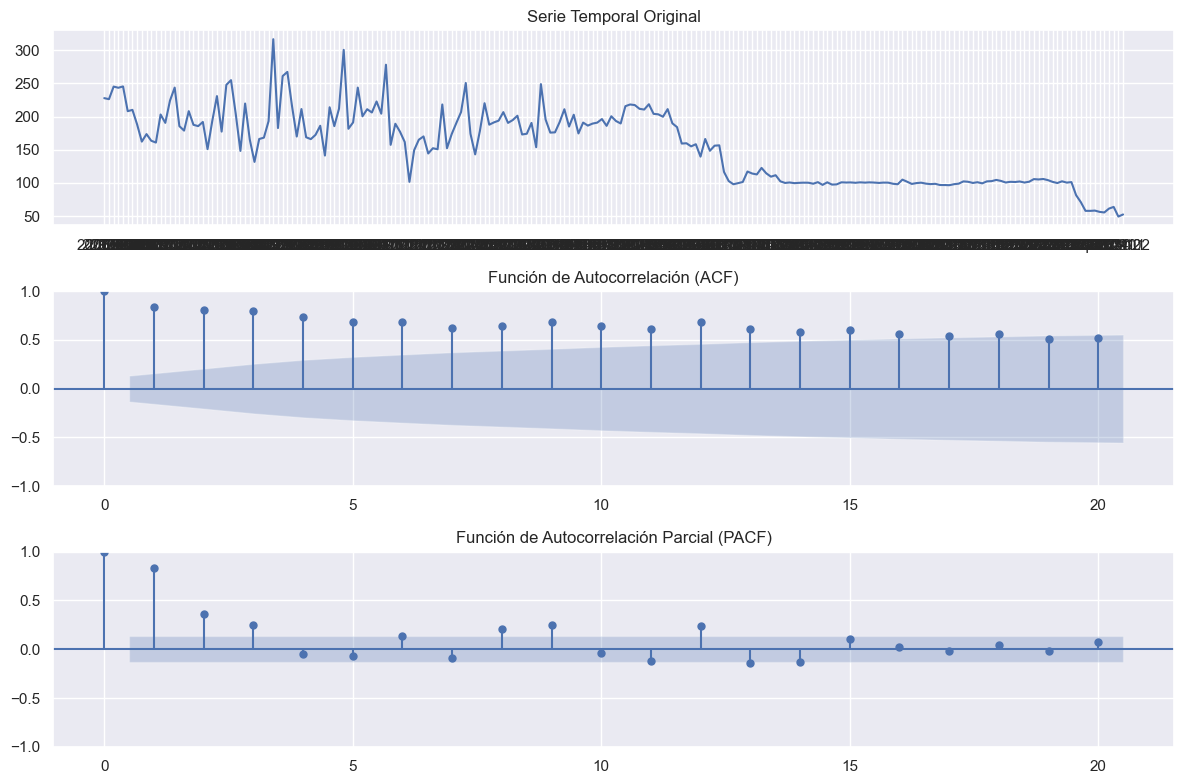

In [39]:
# Grafica la serie original
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df['Oaxaca'])
plt.title('Serie Temporal Original')

# Grafica la función de autocorrelación (ACF)
plt.subplot(3, 1, 2)
plot_acf(df['Oaxaca'], ax=plt.gca(), lags=20)  # 'lags' determina cuántos rezagos mostrar
plt.title('Función de Autocorrelación (ACF)')

# Grafica la función de autocorrelación parcial (PACF)
plt.subplot(3, 1, 3)
plot_pacf(df['Oaxaca'], ax=plt.gca(), lags=20)  # 'lags' determina cuántos rezagos mostrar
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

Podemos notar que en realizad no hay mucha variabilidad, sin embargo, sí hay tendencia. Aplicamos un modelo ARIMA(1,1,1) 

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
modelo_arima = ARIMA(df['Oaxaca'], order=(1,1,1))
resultado = modelo_arima.fit()

c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Value

Aplicamos el estadístico CUSUM para analizar los residuos, además agregamos la región de confianza y notamos que se sale de este rango, podemos decir que el modelo tal vez no es el adecuado.

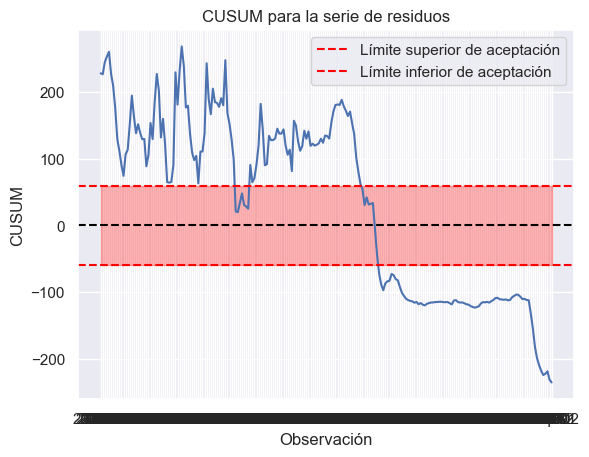

In [46]:
def cusum(residuos):
    return np.cumsum(residuos)
resultado = modelo_arima.fit()
residuos = resultado.resid
cusum_series = cusum(residuos)
std_residuos = np.std(residuos)
limite_superior = 1.96 * std_residuos
limite_inferior = -1.96 * std_residuos
plt.plot(cusum_series)
plt.axhline(0, color='black', linestyle='--')
plt.axhline(limite_superior, color='red', linestyle='--', label='Límite superior de aceptación')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite inferior de aceptación')
plt.fill_between(range(len(cusum_series)), limite_superior, limite_inferior, color='red', alpha=0.3)
plt.title('CUSUM para la serie de residuos')
plt.xlabel('Observación')
plt.ylabel('CUSUM')
plt.legend()
plt.show()

#### Actividad 9.7 Indague cómo trabajar el método de Holt-Winters en R.

Haremos uso de la serie de tiempo del punto anterior 

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Raul\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next vers

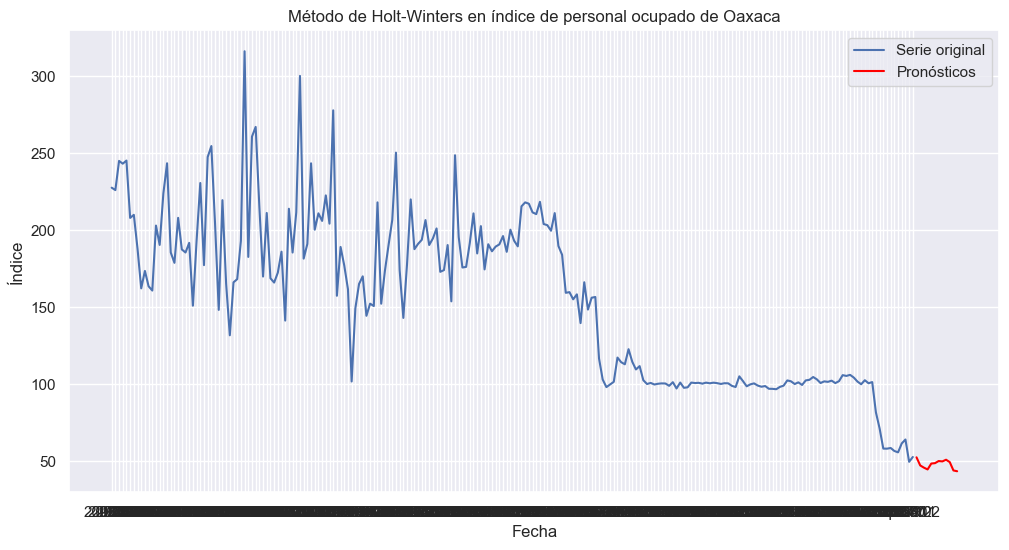

In [49]:
modelo_hw = ExponentialSmoothing(df['Oaxaca'], seasonal_periods=12, trend='add', seasonal='add')
resultado_hw = modelo_hw.fit()
pronosticos = resultado_hw.forecast(steps=12)
plt.figure(figsize=(12, 6))
plt.plot(df['Oaxaca'], label='Serie original')
plt.plot(pronosticos, label='Pronósticos', color='red')
plt.title('Método de Holt-Winters en índice de personal ocupado de Oaxaca')
plt.xlabel('Fecha')
plt.ylabel('Índice')
plt.legend()
plt.show()

#### Ejemplo 9.5.1. Las ventas trimestrales de Tiger Sports Drink de los últimos ocho años se proporcionan en la tabla 7. Obtenga la gráfica de los datos e interprétela. Determine si es adecuado utilizar el método de Holt-Winters (justifique su respuesta) y, en su caso, auxíliese de software para aplicarlo a la serie en cuestión. ¿Cuáles fueron los valores óptimos para las constantes de suavizado? Obtenga pronósticos puntuales e intervalos de predicción para las ventas correspondientes al noveno año.